In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [10]:
# Открыли файл
data = pd.read_csv('cntrbtrs_clnts_ops_trn.csv', encoding='cp1251', sep=';', low_memory=False)
data_time = data
data.head()

,slctn_nmbr,clnt_id,accnt_id,gndr,brth_yr,prsnt_age,accnt_bgn_date,cprtn_prd_d,erly_pnsn_flg,accnt_status,...,dstrct,city,sttlmnt,pstl_code,okato,phn,email,lk,assgn_npo,assgn_ops
0,0,0x03ED62E56DAEA24B96D6F1252D713286,0xFFB14DE2D28AAD45B08AC54ADDFE6AD2,ж,1960,64,2005-12-21,96,0,Накопительный период,...,NaN,ОМСК Г,NaN,644001,5.200000e+10,нет,нет,нет,нет,нет
1,0,0x15138C4A822F1C45A819FCBE6657B810,0x222F5E5BA3715F418662A3C65B0B051F,м,1954,70,2009-06-29,283,0,Накопительный период,...,NaN,БЕЛОГОРСК Г,NaN,676852,1.000000e+10,нет,нет,нет,нет,нет
2,3,0x943D2C768A4FB38311E659ACF7E960C3,0x943D2C768A4FB38311E659ACF7E960C5,м,1955,69,2006-12-25,88,0,Накопительный период,...,NaN,NaN,NaN,109451,4.500000e+10,нет,нет,нет,нет,нет
3,2,0x9CAE18EC4F30054C83C6C78FF70D124A,0xB7BAA18DCFE2E842A7AF84BBE185265C,ж,1962,62,2013-09-03,1301,0,Накопительный период,...,АЛЬМЕТЬЕВСКИЙ Р-Н,АЛЬМЕТЬЕВСК Г,NaN,423464,9.200000e+10,нет,нет,нет,нет,нет
4,2,0xCB416F5FE5D58E41822B4E9A5209747F,0x68D14914CF3A79408F6A6E097C1A61AF,м,1955,69,2010-12-06,106,0,Накопительный период,...,ВОТКИНСКИЙ Р-Н,NaN,МОЛЧАНЫ Д,427415,9.400000e+10,нет,нет,нет,нет,нет


In [3]:
# Замена на фиктивные переменные
# Замену необходимо провести для переменных accnt_status - статус счета, gndr - пол клиента, assgn_npo, assgn_ops
data['accnt_status'] = data['accnt_status'].replace({'Накопительный период': 0, 'Выплатной период': 1})
data['gndr'] = data['gndr'].replace({'ж': 0, 'м': 1})
data['assgn_npo'] = data['assgn_npo'].replace({'нет': 0, 'да': 1})
data['assgn_ops'] = data['assgn_ops'].replace({'нет': 0, 'да': 1})

C:\Users\user\AppData\Local\Temp\ipykernel_7136\2265403259.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['accnt_status'] = data['accnt_status'].replace({'Накопительный период': 0, 'Выплатной период': 1})
C:\Users\user\AppData\Local\Temp\ipykernel_7136\2265403259.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gndr'] = data['gndr'].replace({'ж': 0, 'м': 1})
C:\Users\user\AppData\Local\Temp\ipykernel_7136\2265403259.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fut

In [4]:
# Уберем из датасета ID-переменные(slctn_nmbr, clnt_id, accnt_id), т.к. их нельзя использовать при построении модели и анализе
# Также удалим переменную accnt_bgn_date, содержащую информацию о дате заключения договора
# 'phn', 'email', 'lk' удалим, т.к. они не несут смысловой нагрузки
data = data.drop(columns=['slctn_nmbr', 'clnt_id', 'accnt_id', 'accnt_bgn_date', 'phn', 'email', 'lk'])

In [5]:
# В датасете содержится несколько переменных, отвечающих за адрес клиента
# Из этих переменных наиболее полную информацию отображают pstl_code и okato
# Остальные переменные, связанные с адресом (brth_plc, addrss_type, rgn, dstrct, city, sttlmnt), удаляем
data = data.drop(columns=['brth_plc', 'addrss_type', 'rgn', 'dstrct', 'city', 'sttlmnt'])

In [6]:
# Проверка на пропуски в значениях датасета
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

gndr - 0%
brth_yr - 0%
prsnt_age - 0%
cprtn_prd_d - 0%
erly_pnsn_flg - 0%
accnt_status - 0%
pnsn_age - 0%
prvs_npf - 12%
pstl_code - 0%
okato - 0%
assgn_npo - 0%
assgn_ops - 0%


In [7]:
# Видим, что пропуски содержатся минимум в одном столбце
# Более точную проверку на пропуски можно также осуществить с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532825 entries, 0 to 532824
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gndr           532825 non-null  int64  
 1   brth_yr        532825 non-null  int64  
 2   prsnt_age      532825 non-null  int64  
 3   cprtn_prd_d    532825 non-null  int64  
 4   erly_pnsn_flg  532825 non-null  int64  
 5   accnt_status   532825 non-null  int64  
 6   pnsn_age       532825 non-null  int64  
 7   prvs_npf       469411 non-null  object 
 8   pstl_code      532825 non-null  object 
 9   okato          532133 non-null  float64
 10  assgn_npo      532825 non-null  int64  
 11  assgn_ops      532825 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 48.8+ MB


In [8]:
# Заметим, что пропуски есть в столбцах prvs_npf, okato
# Сначала заполним пропуски для prvs_npf, а затем преобразуем значения к фиктивным переменным
# Пусть 0 - отсутсвие обращения в другой НПФ, 1 - наличие обращения в другой НПФ
data['prvs_npf'] = data['prvs_npf'].fillna(0)
data['prvs_npf'] = data['prvs_npf'].astype(bool).astype(int)

In [9]:
# Нулями заполним пропуски для okato
data['okato'] = data['okato'].fillna(0)

In [10]:
# Теперь преобразуем типы object к числовым типам для дальнейшего анализа
# Для pstl_code
data['pstl_code'] = data['pstl_code'].replace({'******': 0})
data['pstl_code'] = data['pstl_code'].astype(str).astype(int)

In [11]:
# Еще раз выполним проверку на пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532825 entries, 0 to 532824
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gndr           532825 non-null  int64  
 1   brth_yr        532825 non-null  int64  
 2   prsnt_age      532825 non-null  int64  
 3   cprtn_prd_d    532825 non-null  int64  
 4   erly_pnsn_flg  532825 non-null  int64  
 5   accnt_status   532825 non-null  int64  
 6   pnsn_age       532825 non-null  int64  
 7   prvs_npf       532825 non-null  int32  
 8   pstl_code      532825 non-null  int32  
 9   okato          532825 non-null  float64
 10  assgn_npo      532825 non-null  int64  
 11  assgn_ops      532825 non-null  int64  
dtypes: float64(1), int32(2), int64(9)
memory usage: 44.7 MB


In [12]:
# Пропусков нет, типы данных - числовые. Датасет готов к анализу.
# Проведем регрессионный анализ с помощью модели OLS
y = data['erly_pnsn_flg']
x = data[['gndr','brth_yr','prsnt_age', 'cprtn_prd_d','accnt_status','pnsn_age', 'prvs_npf', 'pstl_code', 'okato', 'assgn_npo', 'assgn_ops']]
x = sm.add_constant(x)
lin_model = sm.OLS(y, x)
result_lin_model=lin_model.fit()
print(result_lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:          erly_pnsn_flg   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 8.852e+05
Date:                Sat, 26 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:35:09   Log-Likelihood:             9.0098e+05
No. Observations:              532825   AIC:                        -1.802e+06
Df Residuals:                  532814   BIC:                        -1.802e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.665e-07   1.04e-08    -83.337   

In [13]:
# Исключим из модели pstl_code, assgn_npo, assgn_ops, т.к. для этих переменных p-value > 0.05
data = data.drop(columns=['pstl_code', 'assgn_npo', 'assgn_ops'])

Text(0.5, 1.0, 'Корреляция')

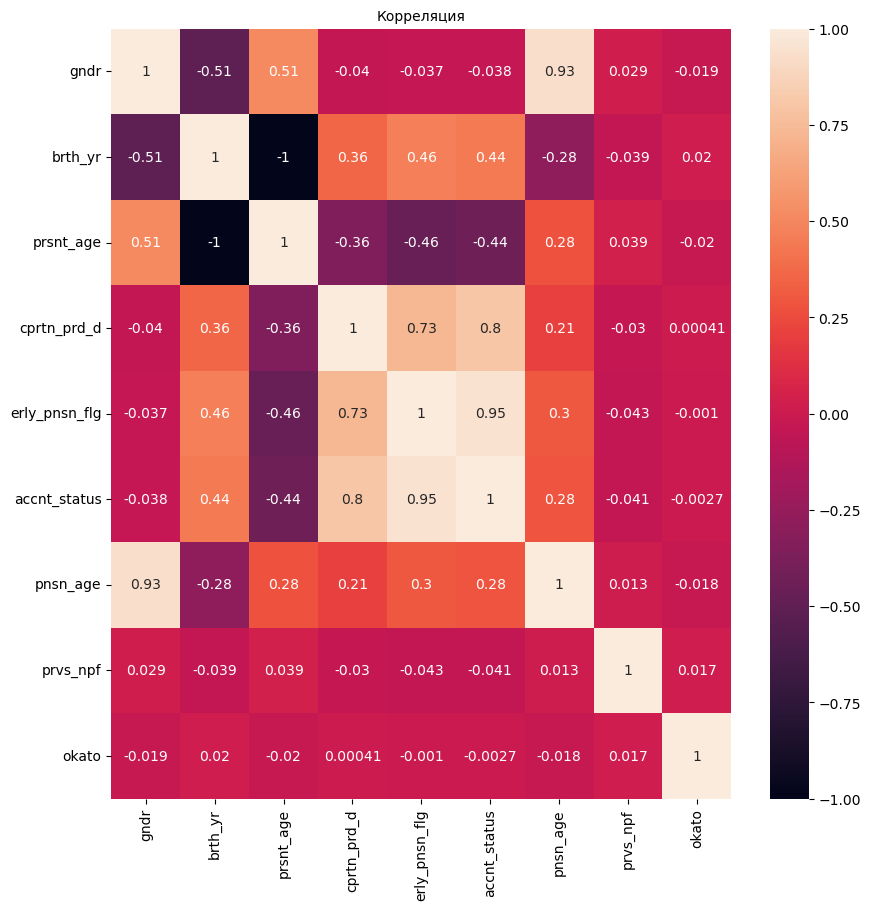

In [14]:
# Построим матрицу корреляций
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot= True)
plt.title('Корреляция', fontsize = 10)

Text(0.5, 1.0, 'Корреляция')

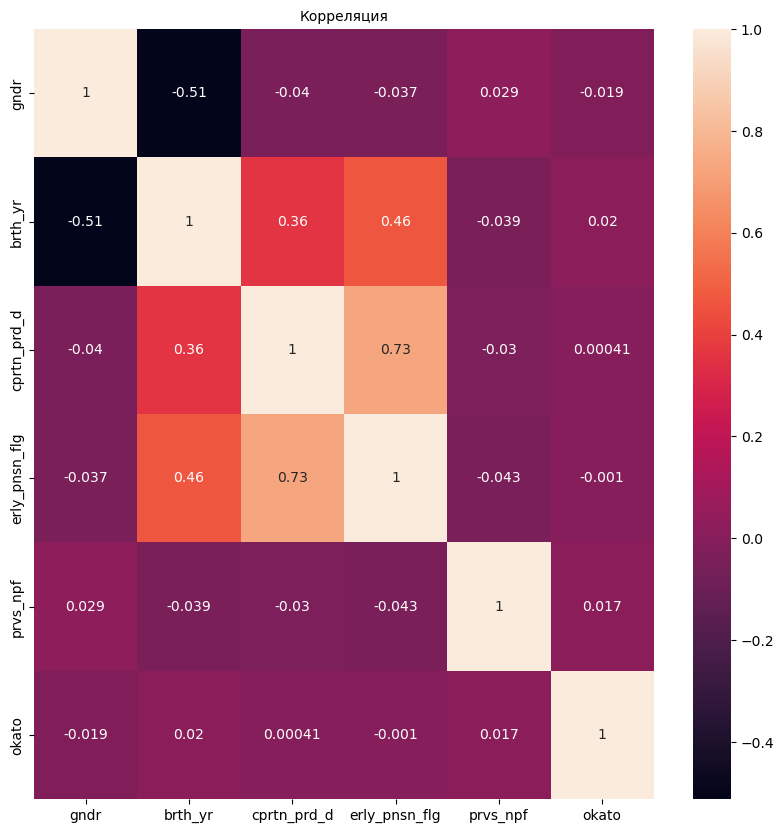

In [15]:
# Исключим из модели все переменные с |коэфф. корреляции| >=0.8
# Повторное построение матрицы корреляций
data = data.drop(columns=['prsnt_age', 'pnsn_age', 'accnt_status'])
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot= True)
plt.title('Корреляция', fontsize = 10)

In [16]:
# Описательная статистика
data.describe()

,gndr,brth_yr,cprtn_prd_d,erly_pnsn_flg,prvs_npf,okato
count,532825.000000,532825.000000,532825.000000,532825.000000,532825.000000,5.328250e+05
mean,0.355661,1959.857501,324.073215,0.036367,0.880985,4.901711e+10
std,0.478714,3.693279,581.011155,0.187201,0.323806,2.718045e+10
min,0.000000,1925.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,1958.000000,108.000000,0.000000,1.000000,2.500000e+10
50%,0.000000,1960.000000,182.000000,0.000000,1.000000,5.200000e+10
75%,1.000000,1962.000000,326.000000,0.000000,1.000000,7.100000e+10
max,1.000000,1987.000000,7269.000000,1.000000,1.000000,9.900000e+10


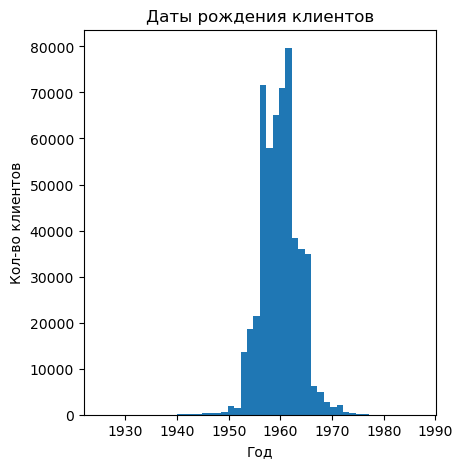

In [18]:
# Узнаем, какие года рождения чаще всех встречаются среди клиентов НПФ
plt.figure(figsize = (10,5))
plt.subplot(121)
data['brth_yr'].hist(bins=50)
plt.title('Даты рождения клиентов')
plt.xlabel('Год')
plt.ylabel('Кол-во клиентов')
plt.grid()
plt.show()

In [18]:
# Вывод: большинство клиентов НПФ родились в период 1955-1965 гг.

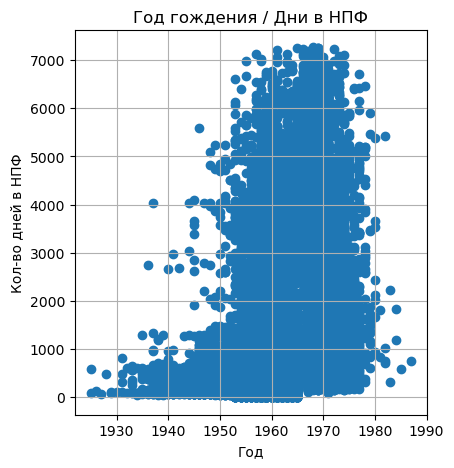

In [20]:
# Построим график для вывления возможной зависимости между годом рождения клиента и кол-вом дней, 
# в течение которых человек является клиентом НПФ
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.scatter(data['brth_yr'], data['cprtn_prd_d'])
plt.title('Год гождения / Дни в НПФ')
plt.xlabel('Год')
plt.ylabel('Кол-во дней в НПФ')
plt.grid()
plt.show()

In [ ]:
# Вывод: дольше всего клиентами НПФ являются люди, родившиеся в 1955-1975 гг.

C:\Users\user\AppData\Local\Temp\ipykernel_12400\3817791154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_time_filt['accnt_bgn_date'] = pd.to_datetime(data_time_filt['accnt_bgn_date'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Самый часто встречающийся год: 1960


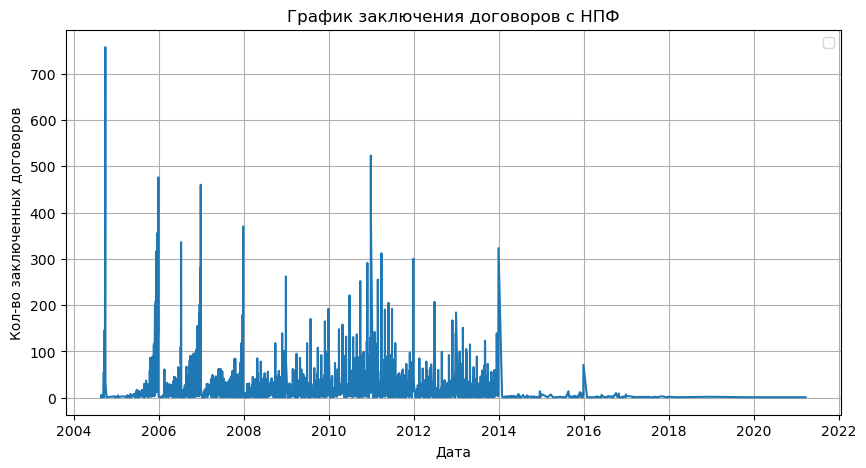

In [23]:
# Для клиентов, чей год рождения наиболее часто встречается среди клиентов, построим график временного ряда,
# чтобы понять, когда эти клиенты заключали договоры с НПФ
data_time = data[['brth_yr', 'accnt_bgn_date']]
mode_dt = data['brth_yr'].mode()[0]
print(f'Самый часто встречающийся год: {mode_dt}')
data_time_filt = data[data['brth_yr'] == mode_dt]
data_time_filt['accnt_bgn_date'] = pd.to_datetime(data_time_filt['accnt_bgn_date'])
ret_count = data_time_filt['accnt_bgn_date'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(ret_count.index, ret_count.values)
plt.title('График заключения договоров с НПФ')
plt.xlabel('Дата')
plt.ylabel('Кол-во заключенных договоров')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Вывод: чаще всего клиенты 1960 г. рождения активно заключали договоры вплоть до 2015 г.
# Заключение договоров практически прекратилось в 2015 году
# В 2015 г. женщины, родившиеся в 1960, достигли возраста 55 лет и стали выходить на пенсию
# Этим и обусловлен резкий спад в количестве заключенных договоров 